# Solución de ecuaciones
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Raíces de ecuaciones 
Las raíces o ceros de una función continua, son los valores de x tal que $f(x) = 0$; lo que es equivalente a resolver ecuaciones del tipo $g(x)=h(x)$, ya que esta ecuación puede reescribirse como $f(x)=h(x)-g(x)=0$. Los métodos numéricos de búsqueda de raíces son algoritmos que iteran sobre una solución aproximada, produciendo una secuencia de números que, con suerte, convergen hacia la raíz como límite.

## Agenda
1. Tipos de ecuaciones
1. Linealidad
1. Solución de ecuaciones 
1. Método de intervalo

In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definir e incluir nuevas funciones al cuaderno
def _significativas(valor, cifras):
    ''' Reducir un valor a un numero de cifras significativas '''
    Primera_significativa = -int(m.floor(m.log10(abs(valor))))
    decimales = Primera_significativa + cifras - 1
    return round(valor, decimales)

def _normalizar(valor, referencia):
    ''' Aproximar un numero a las cifras significativas de la referencia'''
    Primera_significativa = -int(m.floor(m.log10(abs(referencia))))
    cifras = Primera_significativa + 1
    return _significativas(valor, cifras)

def _zeros(a, b, c):
    # Raíces de la ecuación
    t1 = (- b + (b**2-4*a*c)**(1/2)) / (2*a)
    t2 = (- b - (b**2-4*a*c)**(1/2)) / (2*a)
    return t1, t2

## 1. Tipos de Ecuaciones
---
En matemáticas una ecuación es una igualdad entre dos expresiones, separadas por el signo igual; tal que en las expresiones miembro aparecen variables independientes relacionadas mediante operaciones matemáticas.

\begin{align}
f(x_1, x_2, ... , x_n) &= g(x_1, x_2, ... , x_n) \\
f(x_1, x_2, ... , x_n) &= 0 \\
\end{align}

### a. Ecuaciones de una variable
Una simplificación de esta igualdad sucede cuando la variable independiente y la ecuacion se puede reescribir como:

\begin{align}
f(x) & = 0 \\
\end{align}

### b. Ecuaciones algebraicas o polinómicas
Una simplificación adicional de esta expresión sucede cuando sus miembros incluyen unicamente sumas y multiplicaciones de la variable independiente; en cuyo caso la expresión se conoce como polinomio y se puede reescribir como la suma de <code>n+1</code> monomios cuyos coeficientes o parámetros $a_0, a_1, a_2, ... , a_n$ son constantes en el dominio de los reales:

\begin{align}
f(x) & = 0 \\
a_0 + a_1 x + a_2 x^2 + ... + a_n x^n & = 0, \quad a_n \neq 0 \\
\end{align}

> **NOTA:** El número n se denomina grado de la ecuación y es igual al numero raíces o ceros que son solución de la igualdad; estas soluciones pertenecen al dominio de los complejos y pueden ser reales o imaginarias; en el caso de soluciones imaginarias se dan en parejas de complejos conjugados.

### c. Ecuaciones trascendentes
Si la ecuación no puede expresarse o reducirse a un polinomio como las ecuaciones algebraicas se denominan ecuaciones trascendentes y su resolución va más allá del álgebra (trascienden el álgebra); las ecuaciones trascendentes más simples son las trigonométricas, logarítmicas y exponenciales sencillas.

> **NOTA:** La solución para x de estas ecuaciones puede no ser trivial y suelen ser objeto de estudio de los métodos numéricos.


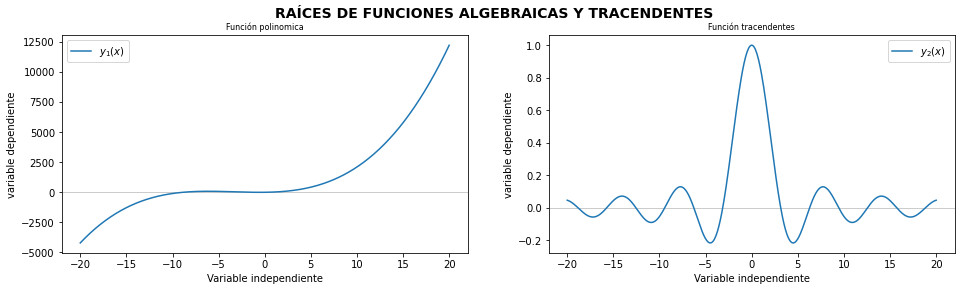

In [2]:
x = np.linspace(-20, 20, 512, endpoint=True)
y1 = x**3 + 10*x**2 + 10*x - 10
y2 = np.sin(x)/x

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas y tracendentes'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y1, label="$y_1(x)$")
ax[0].set_title("Función polinomica", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y2, label="$y_2(x)$")
ax[1].set_title("Función tracendentes", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].set_ylabel("variable dependiente")
ax[1].legend()

plt.show()

## 2. Linealidad
---
### a. Ecuaciones lineales
Un caso particular de las ecuaciones algebraicas sucede cuando solo los dos primeros coeficientes son distintos de cero y la solución para x es única y trivial.

\begin{align}
a_0 + a_1 x & = 0, \quad a_1 \neq 0 \\
x & = \frac{-a_0}{a_1} \\
\end{align}

### b. Ecuaciones cuadráticas
Un caso particular de las ecuaciones algebraicas sucede cuando solo los tres primeros coeficientes son distintos de cero y las 2 soluciones para x es un par de complejos conjugados.

\begin{align}
a_0 + a_1 x + a_2 x^2 & = 0, \quad a_1 \neq 0 \\
x_1, x_2 & = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_2 a_0 }}{2 a_2} \\
\end{align}

### b. Ecuaciones de orden superior
Cuando más de tres coeficientes son distintos de cero en las ecuaciones algebraicas sucede que el número de soluciones es proporcional al orden de la ecuación; aunque la solución algebraica es posible debido a que existen métodos matemáticos para acotar la solución.

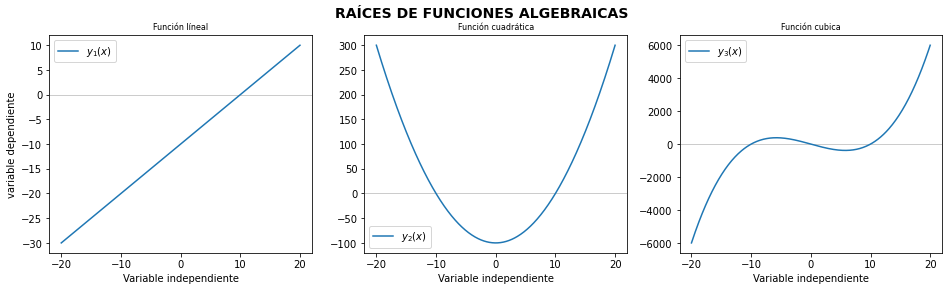

In [3]:
y3 = (x - 10)
y4 = (x - 10) * (x + 10)
y5 = (x + 10) * (x - 10) * x 

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y3, label="$y_1(x)$")
ax[0].set_title("Función líneal", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y4, label="$y_2(x)$")
ax[1].set_title("Función cuadrática", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[2].plot(x, y5, label="$y_3(x)$")
ax[2].set_title("Función cubica", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()

## 2. Solución de ecuaciones no lineales
---
Para seleccionar un método numérico que nos permita encontrar las raíces de una ecuación por aproximaciones sucesivas se requiere conocer información preliminar como:

* Tipo de ecuación.
* Número y tipo de las posibles raíces de la ecuación.
* Información del dominio, rango, continuidad, derivadas, intervalos de crecimiento.
* Ventajas y limitaciones que aporta cada algoritmo a la solución del problema.
* Semilla o valoración inicial de la solución.

### a. Consideraciones generales
Del [teorema del valor intermedio](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio) se tiene que si $f(x)$ es continua en un intervalo (a, b) y cambia de signo en ese intervalo existe al menos una raíz real de la ecuación asociada en ese intervalo; sin embargo, existen consideraciones particulares para cada uno de los tipos de ecuaciones estudiadas.

### b. Ecuaciones algebraica
* El número de raíces es igual al grado del polinomio asociado.
* La posible existencia de raíces múltiples complica el problema; pero si $f(x)$ es derivable en (a, b) y $f'(x)$ no cambia de signo en el ese intervalo, la raíz en ese intervalo es única.
* Existen métodos como la [regla de Descartes](https://es.wikipedia.org/wiki/Regla_de_los_signos_de_Descartes), el [teorema de Budan]() y [teorema de Sturm](https://es.wikipedia.org/wiki/Teorema_de_Sturm) que nos permiten acotar convenientemente las raíces del polinomio.

### c. Ecuaciones trascendentes
* Estas ecuaciones pueden tener cualquier número de posibles soluciones.
* Pueden tener ninguna, una o más raíces en un intervalo.
* Garantizar la existencia y unicidad de soluciones en estas ecuaciones es difícil de determinar y existe una mayor variedad de casos y comportamientos.
* Pueden tener múltiples raíces, donde tanto la función $f(x)$ como su derivada $f'(x)$ son iguales a cero.
* Algunas ecuaciones no pueden resolverse por métodos numéricos aún con un número muy grande de iteraciones



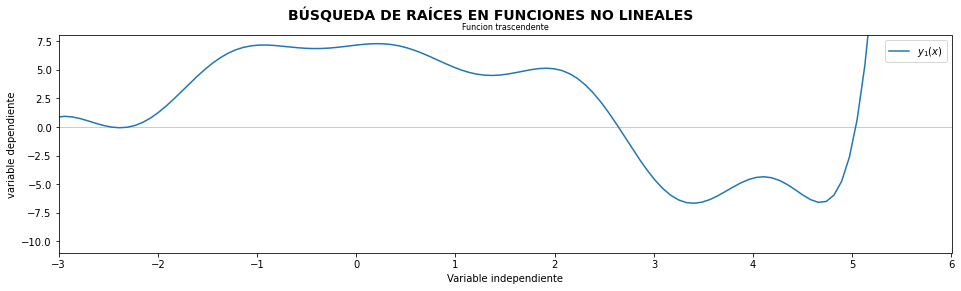

In [4]:
y6 = np.exp(3*x - 12) + x * np.cos(3*x) - x**2 + 7.15

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 4)
fig.suptitle('Búsqueda de raíces en funciones no lineales'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax.axhline(y = 0, linewidth=1.0, color="#ccc")
ax.plot(x, y6, label="$y_1(x)$")

ax.set_xlim(-3, 6)
ax.set_ylim(-11, 8)

ax.set_title("Funcion trascendente", fontsize=8)
ax.set_xlabel("Variable independiente")
ax.set_ylabel("variable dependiente")
ax.legend()

plt.show()

## Analizando la figura anterior se observa:
* La función $f$ asociada a la ecuación $f(x)=0$ es continua
* En el intervalo (-3, -2) visualmente no es posible determinar si la curva corta el eje $x$ una vez, dos veces o ninguna; con la posibilidad que el método pueda no detectar un intervalo válido, porque el signo $f(-3)$ es igual al signo de $f(-2)$.
* En los intervalos (2, 3) y (5, 6) existe una única raíz real.


---
## Mas Recursos

- [Ecuación](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n) (Wikipedia)
- [Ecuación algebraica](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_algebraica) (Wikipedia)
- [Polinomio](https://es.wikipedia.org/wiki/Polinomio) (Wikipedia)
- [Solución de Ecuaciones](https://es.wikipedia.org/wiki/Resoluci%C3%B3n_num%C3%A9rica_de_ecuaciones_no_lineales) (Wikipedia)
